In [52]:
%run velikaMestaEvrope.py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import operator
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

plt.rcParams['figure.figsize'] = (15, 5) # Nastavitev velikosti grafon
pd.options.display.max_rows = 8 # Nastavitev maks. št. prikazanih vrstic v tabeli

Datoteke že obstajajo.


# Analiza krajev glede na temperaturne značilnosti
#### PROJEKTNA NALOGA PRI PROGRAMIRANJU 1

Podatki so zajeti iz sledečih spletnih strani: <br />
* http://www.weatherbase.com/ 
država, mesto,  id, povprečne temperature posameznih mesecev, povprečna količina padavin v posameznih mesecih; <br />
* https://www.countries-ofthe-world.com/capitals-of-europe.html:
seznam Evropskih držav z njihovimi prestolnicami.

Podatki so nato urejeni v 4 različne CSV datotekah: <br />
1.) PrestolniceDrzav.csv <br />
2.) Temperature.csv <br />
3.) Padavine.csv <br />
4.) Ekstremi.csv <br />
Vsaka CSV datoteka vsebuje podatke za eno izmed tabel, vse tabele pa so med seboj povezane preho stolpca z imenom sifra.

## Uvod

##  Analiza glavnih mest evropskih drzav
#### 1.) Uvoz osnovnih tabel s podatki in njihov pregled:

In [3]:
Prestolnice = pd.read_csv('CSVdatoteke\\PrestolniceDrzav.csv', encoding='latin1')
Temperature = pd.read_csv('CSVdatoteke\\Temperature.csv', encoding='latin1')
Padavine = pd.read_csv('CSVdatoteke\\Padavine.csv', encoding='latin1')
Ekstremi = pd.read_csv('CSVdatoteke\\Ekstremi.csv', encoding='latin1')

Prva tabela vsebuje imena Europskih držav in njihovih glavnig mest.

In [4]:
Prestolnice

,MESTO,Drzava,sifra
0,Bratislava,Slovakia,61811
1,Vatican City,Holy See,24261
2,Berlin,Germany,58301
3,Monte Carlo,Monaco,528525
...,...,...,...
37,Rome,Italy,124261
38,Helsinki,Finland,47920
39,Nicosia,Cyprus,60671
40,Riga,Latvia,22462


Druga tabela prikazuje podatke o povprečnih mesečnih in letni temperaturi posameznih mest iz gornje tabele.

In [5]:
Temperature

,sifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,letno povprecje temperatur
0,61811,-0.6,1.1,6.1,10.0,15.0,18.3,20.6,20.0,16.7,10.6,4.4,1.1,10.28
1,24261,8.3,8.9,11.1,12.8,17.2,20.6,23.9,23.9,21.7,17.8,12.8,9.4,15.70
2,58301,-0.6,0.6,4.4,7.8,12.8,16.7,18.3,17.8,14.4,9.4,4.4,1.1,8.93
3,528525,8.4,7.2,8.5,10.4,12.9,16.5,20.0,22.8,22.8,20.2,16.1,11.5,14.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,124261,8.3,9.1,10.6,13.2,16.9,20.6,23.4,23.6,20.9,17.0,12.7,9.5,15.48
38,47920,-5.6,-6.1,-2.2,3.3,10.0,13.9,16.7,15.0,10.0,5.0,0.0,-3.9,4.68
39,60671,10.0,10.0,12.2,16.7,21.7,25.6,28.3,28.3,25.6,20.6,16.1,11.7,18.90
40,22462,-3.3,-3.3,0.6,5.6,11.7,15.6,17.2,16.7,12.2,7.2,2.8,-1.7,6.78


Tretja tabela prikazuje podatke o povprečnih mesečnih in letni količini padavin posameznih mest iz gornje tabele.

In [6]:
Padavine

,sifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,letno povprecje padavin
0,61811,1.4,1.6,1.5,1.4,2.2,2.8,2.5,2.4,1.5,1.6,2.1,2.0,2.0
1,24261,3.2,2.8,2.7,2.6,2.0,1.3,0.6,1.0,2.7,4.5,4.4,3.8,3.0
2,58301,1.7,1.3,1.4,1.6,2.2,2.8,1.8,2.4,1.8,1.4,1.9,2.0,2.0
3,528525,3.5,3.0,2.9,2.9,2.5,1.9,1.5,0.7,1.2,2.6,4.4,4.6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,124261,3.2,3.0,2.6,2.1,1.2,0.6,0.6,1.3,2.7,3.7,4.3,3.5,2.0
38,47920,1.8,1.4,1.4,1.5,1.7,1.8,2.4,2.9,2.6,2.7,2.6,2.2,2.0
39,60671,2.9,2.0,1.3,0.8,1.1,0.4,0.0,0.0,0.2,0.9,1.7,3.0,1.0
40,22462,1.3,0.9,1.0,1.4,1.7,2.3,2.8,2.7,2.6,2.1,2.0,1.5,2.0


In [7]:
Ekstremi

,sifra,minimalna T,maksimalna T,standardni odklon mesecnih temperatur od letnega povprecja,minimum P,maksimum P,standardni odklon mesecnih padavin od letnega povprecja
0,61811,-0.6,20.6,7.46,1.4,2.8,0.46
1,24261,8.3,23.9,5.63,0.6,4.5,1.20
2,58301,-0.6,18.3,6.68,1.3,2.8,0.42
3,528525,7.2,22.8,5.49,0.7,4.6,1.14
...,...,...,...,...,...,...,...
37,124261,8.3,23.6,5.43,0.6,4.3,1.19
38,47920,-6.1,16.7,7.95,1.4,2.9,0.52
39,60671,10.0,28.3,6.74,0.0,3.0,0.99
40,22462,-3.3,17.2,7.47,0.9,2.8,0.63


### 2.) Analiza podatkov:

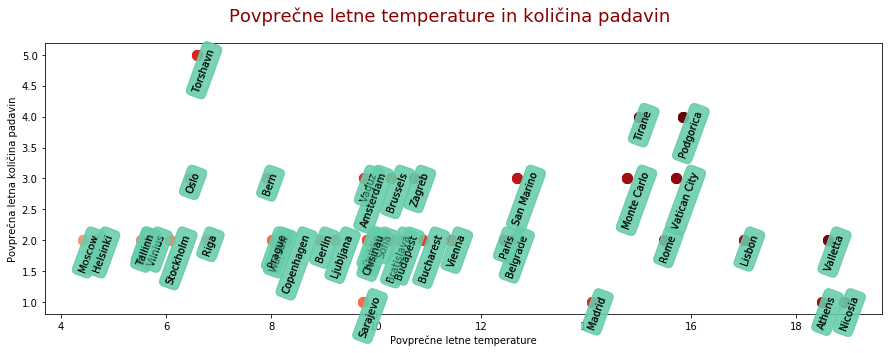

In [11]:
zdruzena = Prestolnice.merge(Temperature,on='sifra', how='left')
zdruzena = zdruzena.merge(Padavine,on='sifra', how='left')

for ime, x, y in zip(Prestolnice['MESTO'], Temperature['letno povprecje temperatur'], Padavine['letno povprecje padavin']):
    rdece = plt.get_cmap('Reds')
    plt.plot(x, y, marker='o', color=rdece((x + ( 2 * y))/(23.61)),markersize=10)
    plt.annotate(ime, (x - 0.1,y),rotation='70', bbox=dict(boxstyle='round,pad=0.5', color='mediumaquamarine', alpha=0.5))
plt.xlabel('Povprečne letne temperature')
plt.ylabel('Povprečna letna količina padavin')
plt.suptitle('Povprečne letne temperature in količina padavin', fontsize=18,color='darkred')
plt.show()

Na zgornjem grafu lahko opazimo, da se mesto z iztopajočo najvišjo povprečno letno količino padavin Torshavn (slo. Torshavn), nahaja med mesti z nizko povprečno letno temperaturo. Hkrati pa imajo tri najbolj vroča mesta Nicosia (slo. Nikozija), Athens (slo. Atene) in Valletta (slo. Valletta) zelo nisko količino padavin. Vsa omenjena mesta so obmorska, vendar ležijo v različnih europskih regijah. Omenjene lastnosti nekoliko nakazuje na obratno sorazmerje med količino padavin, ter temperaturo. <br />
Vendar pa imamo tudi mesta Podgorica (slo. Podgorica), Vatican City (slo. Vatikan) in Tirane (slo. Tieana), ki se nahajajo na grafu najbolj desno-zgoraj in imajo hkrati nadpovprečno visoke temperature in količino padavin. Ter nekaj mest na grafu levo spodaj, z nizko količino padavin, ter nizkimi temperaturami. <br />
Vidimo torej, da je o očitni soodvisnosti med danima količinama nemogoče sklepati. To je tudi posledica številnih drugih podnebnih dejavnikov, ki sočasno vplivajo na temeraturne in padavinske značilnosti krajev.

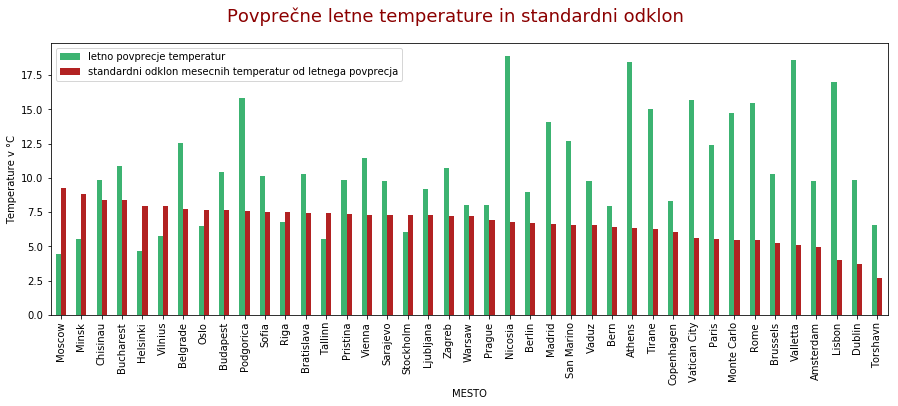

In [12]:
Zdruzena1 = Prestolnice.merge(Ekstremi, on='sifra', how='left')
Zdruzena2 = Zdruzena1.merge(Temperature, on= 'sifra', how='left')
Zdruzena3 = Zdruzena2.set_index('MESTO')
graf1 = Zdruzena3[['letno povprecje temperatur','standardni odklon mesecnih temperatur od letnega povprecja']].sort_values('standardni odklon mesecnih temperatur od letnega povprecja', ascending=False).plot(kind='bar',color=['mediumseagreen','firebrick'])
graf1.set_ylabel('Temperature v °C')
plt.suptitle('Povprečne letne temperature in standardni odklon',fontsize=18,color='darkred')
plt.show()

Na grafu so padajoče prikazani standardni odkloni mesečnih temperatur od letnega povprečja. Videti je, da imajo kraji z višjimi letnimi povprečnimi temperaturami praviloma nekoliko manjše standardne odklone od povprečja. <br />
Pri krajih z velikimi standardnimi odkloni se lahko visoke in nizke (< 0°C) temperature med seboj precej izničujejo, zato so podatki o letnem povprečju temperatur teh krajev manj povedni, saj se mesečne temperature lahko precej razlikujejo od letnega povprečja.

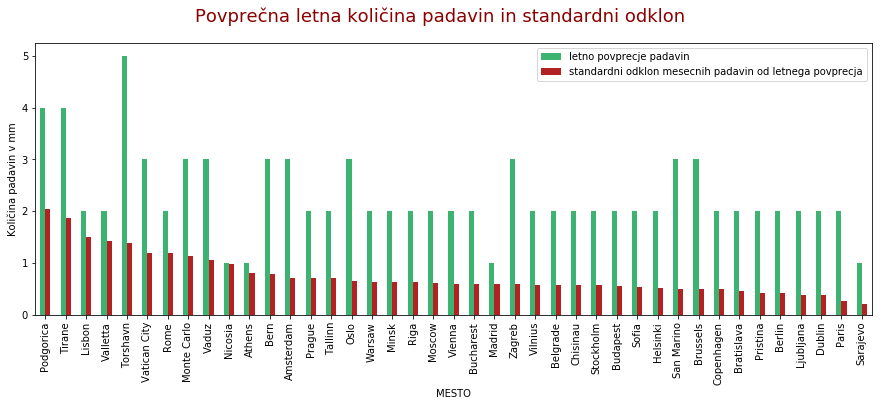

In [13]:
Zdruzena11 = Prestolnice.merge(Ekstremi, on='sifra', how='left')
Zdruzena12 = Zdruzena11.merge(Padavine, on= 'sifra', how='left')
Zdruzena13 = Zdruzena12.set_index('MESTO')
graf2 = Zdruzena13[['letno povprecje padavin','standardni odklon mesecnih padavin od letnega povprecja']].sort_values('standardni odklon mesecnih padavin od letnega povprecja', ascending=False).plot(kind='bar',color=['mediumseagreen','firebrick'])
graf2.set_ylabel('Količina padavin v mm')
plt.suptitle('Povprečna letna količina padavin in standardni odklon', fontsize=18,color='darkred')
plt.show()

Ta graf vsebuje podobne podatke kot prejšnji, le da se ti nanašajo na količino padavin. Opaziti je nekoliko bolj premo sorazmeren standardni odklon z količino padavin. <br />
Tukaj se ne srečujemo z podobnim problemom kot zgoraj, saj se količine padavin med seboj ne morejo izničevati, ker imajo le te ves čas pozitivne vrednosti.

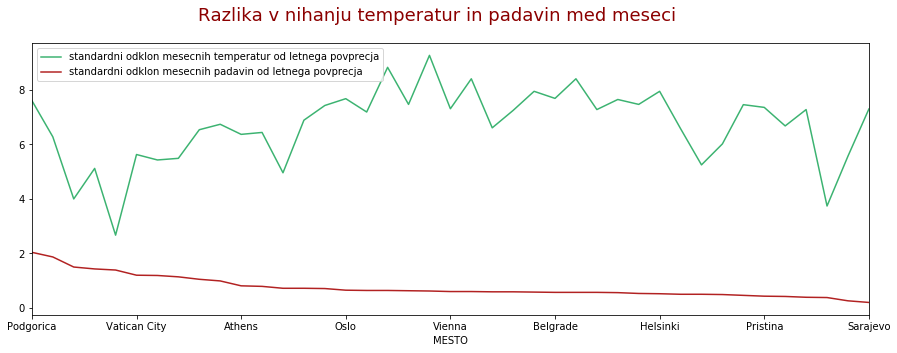

In [14]:
graf3 = Prestolnice.merge(Ekstremi,on='sifra', how='left')
graf3 = graf3.set_index('MESTO')
graf3[['standardni odklon mesecnih temperatur od letnega povprecja','standardni odklon mesecnih padavin od letnega povprecja']].sort_values('standardni odklon mesecnih padavin od letnega povprecja', ascending=False).plot(kind='line',color=['mediumseagreen','firebrick'])
plt.suptitle('Razlika v nihanju temperatur in padavin med meseci',fontsize=18, color='darkred')
plt.show()

Opomniti je potrebno, da podatki vnešeni z različnima barvama na zgornjem grafu niso podani v istih merskih enotah, zato je na grafu primerljiv le trend med standardnima odklonoma obeh spremenljuvk. <br />
Ni opaziti, da bi imela mesta z večjim nihanjem temperature, tudi večje razlike v količini padavin med posameznimi meseci.

### 3.) Prikaz podatkov na zemljevidu:

In [53]:
def narisi_zemljevid(ime_datoteke, normiranje, st, zacetnaVelikost, povecaj, naslov):
    plt.figure(figsize=(30,17))

    map = Basemap(projection='merc', lat_0=50, lon_0=0,
        resolution = 'l', area_thresh = 1000.0, llcrnrlon=-25, llcrnrlat=30,
        urcrnrlon=75, urcrnrlat=75)

    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color='mediumaquamarine')

    rdece = plt.get_cmap('Reds')
    modre = plt.get_cmap('Blues')
    geolocator = Nominatim()
    mestaPoDrzavah = glavna_mesta_drzav()
    podatki = beri_podatke(ime_datoteke, st)

    for mesto, podatek in podatki.items():
        try:
            if mesto == 'Athens':
                x, y = map(23.7333333, 37.9833333)
            else:
                lokacija = geolocator.geocode(mesto)
                x, y = map(lokacija.longitude, lokacija.latitude)
            if float(podatek) < 0:
                map.plot(x, y, marker='o', color=modre((-1) * float( podatek)/8.9),markersize=zacetnaVelikost + (float(podatek) * povecaj))
                plt.text(x, y, mesto)
            else:
                map.plot(x, y, marker='o', color=rdece(float(podatek)/normiranje),markersize=zacetnaVelikost + (float(podatek) * povecaj))
                plt.text(x, y, mesto)
        except:
            if 'Kiev' in mesto:
                lokacija = geolocator.geocode('Kiev')
                x, y = map(lokacija.longitude, lokacija.latitude)
            if float(podatek) < 0:
                map.plot(x, y, marker='o', color=modre((-1) * float( podatek)/8.9),markersize=zacetnaVelikost + (float(podatek) * povecaj))
                plt.text(x, y, 'Kiev')
            else:
                map.plot(x, y, marker='o', color=rdece(float(podatek)/normiranje),markersize=zacetnaVelikost + (float(podatek) * povecaj))
                plt.text(x, y, 'Kiev')
    plt.suptitle(naslov, fontsize=21,color='darkred')
    
    plt.show()

C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


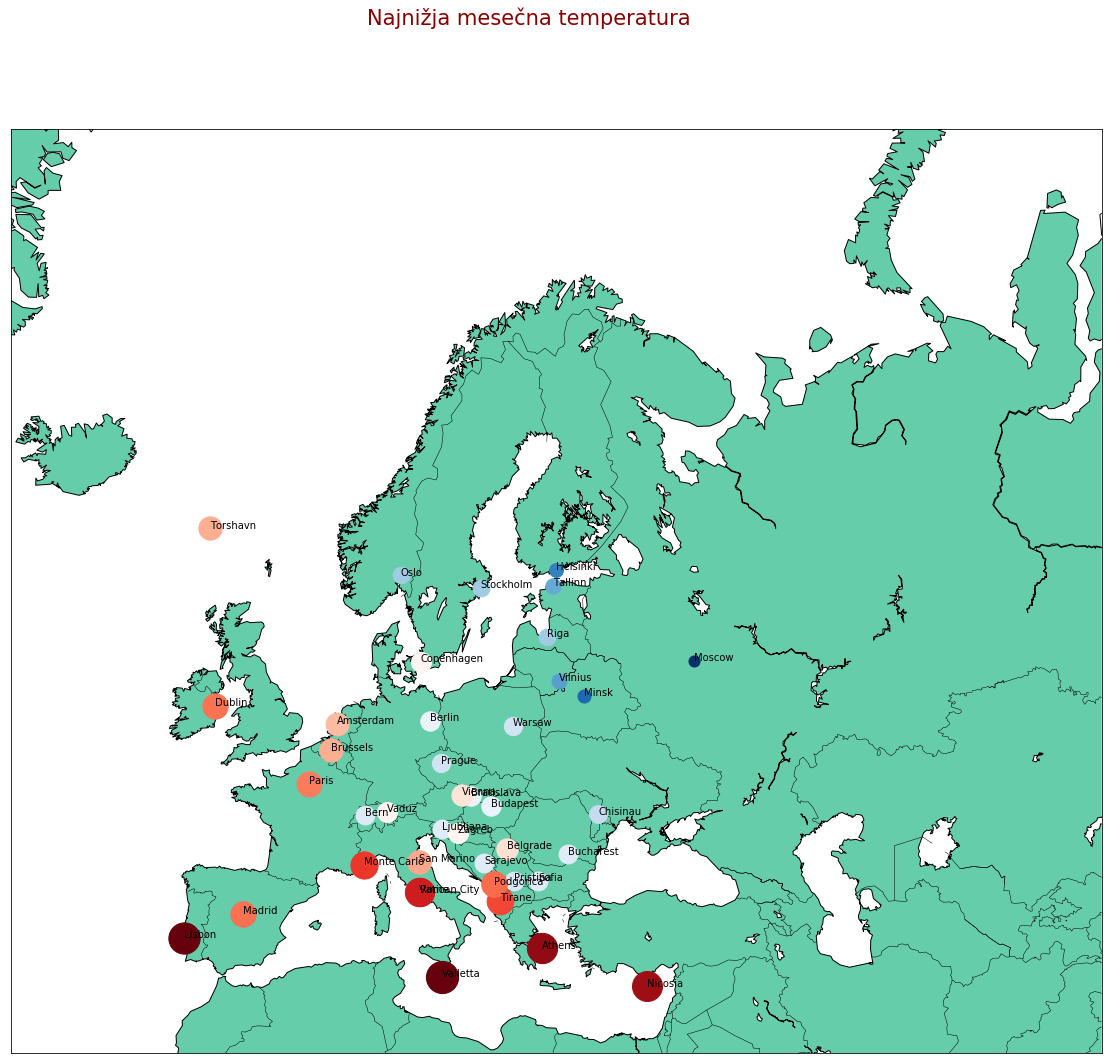

In [54]:
narisi_zemljevid('CSVdatoteke\\Ekstremi.csv',11.3,1,20,1, 'Najnižja mesečna temperatura')

Na zgornjem zemljevidu so prikazane temperature po krajih v najhladnejšem mesecu v letu.(Opomniti velja, da so meseci v katerih so bile izmerjene prikazane temperature, lahko tudi med različnimi kraji različni.) <br />
Na zemljevidu je opaziti, da je geografska lega dejavnik, ki zelo pomembno vpliva na temperaturo, saj imajo kraji iz bližnjih delov Evrope praviloma podobno visoke temperature. <br />
Kraji iz Zahodnje in Južne Europe imajo tudi v najhladnejšem mesecu temperature nad 0°C. Med tem ko v bolj celinskih telih Europe prevladujejo kraji z najnižjimi zemperaturami pod 0°C.

C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


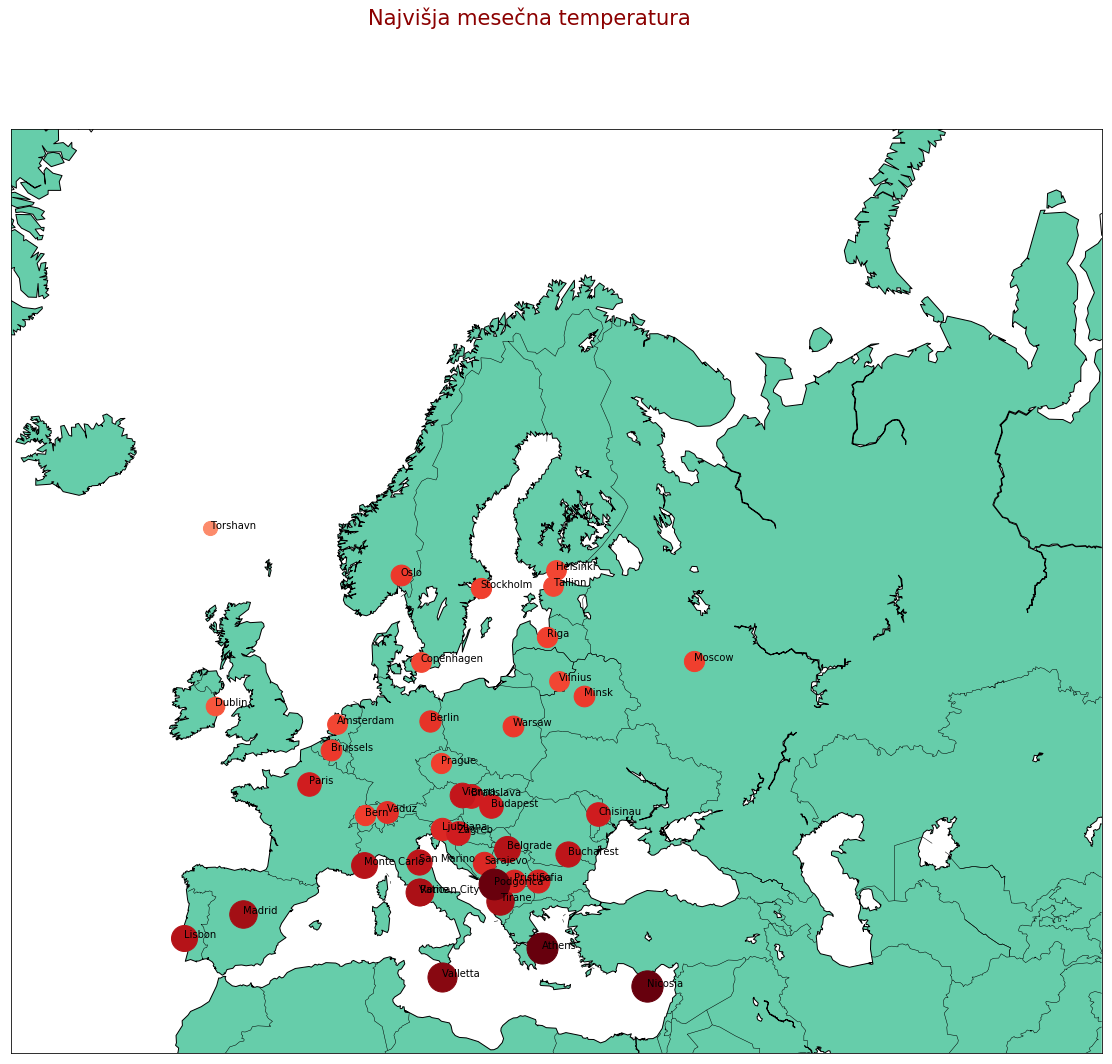

In [55]:
narisi_zemljevid('CSVdatoteke\\Ekstremi.csv',28,2,3,1, 'Najvišja mesečna temperatura')

## Zaključek

Opazili smo, da je temperatura posameznih krajev bolj povezana z njihovo geografsko lego, kot s količino padavin.